## Lab #6 - What A Drag

### PHYS 163

***

In this lab we will look at the force of drag (air resistance), both experimentally using a motion sensor, and by creating a numerical simulation based on your data.

In general, drag forces are those which depend on velocity.  For objects moving at very slow speeds the drag force depends on the velocity, and mainly comes from friction between air (or water) and the object as it moves.  For faster moving objects (such as the ones you will measure in lab), the drag force is proportional to velocity squared.  This is because as the object moves faster it encounters more air molecules, and as those molecules bounce off the object their momentum changes by a larger amount.  Hence two factors of $v$.

If we look at objects in free-fall, we can write the net force as:

$$ F_{\rm net} = mg - bv^2 $$

Here we take the down direction to be positive, and similar to friction, the drag force always acts opposite to velocity.  $b$ is called the drag coefficient and depends on the shape and size of the object, the density of air, and a few other variables.

As the object falls faster and faster, eventually the drag force will equal the objects weight, and the object will stop accelerating as the net force is zero.  This speed is called terminal velocity, and can be found by setting the net force above equal to zero.

$$ v_{\rm term} = \sqrt{\frac{mg}{b}} $$

In this lab we will do two things: first, we will measure position and velocity for a falling object.  From the data we will estimate the object's coefficient of drag.  Then, we will model the object's motion numerically and compare the results to your actual data.

***

### Data Collection

Please be forewarned that this portion of the lab requires some patience.  It can often take several trials to get good data.  If you aren't sure, ask your lab instructor if your results are worth saving.

The motion detector should be mounted on a lab stand and aimed at the floor.  Please keep the area underneath it clear, so don't place any lab stools, bags, etc. there.

* Open the Capstone file provided by your lab instructor (you may need to download it from Canvas first).

* To connect the motion sensor, click on the "Hardware Setup" icon on the left side of the window.

* Press the small black power button on the side of the motion sensor.  A red LED on the sensor should begin blinking.

* Look for your sensor in the Capstone hardware list.  Each sensor has a unique 6-digit ID number printed on the side, so make sure you connect to the right sensor (and not your neighbor's).  Once your sensor is connected, you may close the hardware list by clicking on the icon again.

* At the bottom of the Capstone window, make sure the sample rate is set to 40 Hz.  You may also wish to zero the sensor by placing your hand over it, and clicking on the small icon just to the right of the sample rate setting.

* For good results, you need to make sure your object is directly underneath the motion sensor, and there are no other objects interfering.  Without placing anything under the sensor, click on "Record" to begin taking data.  You should hear the sensor clicking as it sends out ultrasonic pulses to measure the range.

* Click on stop after a second or two.  Examine the graph of distance vs time.  What is the sensor measuring the distance to?  Does that distance seem reasonable?

* Click on "Delete Last Run" at the bottom of the window to remove your data.  It's best to keep your graphs from getting cluttered until you have good quality data.

* Hold your object under the beam, and move it slowly up and down while collecting data.  You should see the position and velocity smoothly change.  If not, perhaps you are holding it out of the beam, or starting with the object too close.  Play around until you get a good feel for how the sensor works.

* Once you are ready, take data while releasing the object from rest.  You will need to experiment with different techniques to ensure the object starts falling from rest, and you do not interfere with the beam as it falls, without the object moving out of the beam.  As stated before, it may take many attempts before you get a nice curve of velocity vs. time.  It's ok if your data are poor after the object hits the floor, but you should have **smooth curves** for both position and velocity as the object falls.

* When you finally have good data, make sure to show your instructor before moving on.

* Save your data by going to the File menu and choosing Export.  Save your data as a CSV file.  You can uncheck the columsn for acceleration, we will not be using those values.  Make sure to note the time values where you dropped the object, and the time value when it hit the floor.  You will need these later.

***

### Analysis of Your Measurements

We will be analyzing your data in JupyterLab, as usual.

* Upload your CSV file to JupyterLab by clicking on the "up arrow" above the file list.  It should appear in the file list.

To import and organize your data, we will be using a Python library called pandas.  Pandas is incredibly powerful, and allows you to import, manipulate, clean, sort, and reshape data with ease.  Its capabilities extend far beyond what we will use here.

Let's say your data file is called `drag.csv`, located in a folder called `data`.  To import your file:

In [1]:
from pandas import read_csv

df = read_csv('data/drag.csv',header=0,names=['t','x','v'])

Your CSV file will probably be located in the same directory as your notebook, so you won't need the `data/` part.  This loads your data into a pandas dataframe (`df`).  The `header=0` command tells pandas to ignore the first line of the file, since it's a header which contains column names.  The `names=[...]` option tells pandas to use column names of `t`, `x`, and `v` instead of the Capstone-generated column names of `Position (m) Run #1` or whatever it gives you by default.

Let's take a look at the data:

In [2]:
print(df)

         t     x     v
0    0.000  0.08   NaN
1    0.025  0.08  0.00
2    0.050  0.08  0.00
3    0.075  0.08  0.00
4    0.100  0.08  0.01
..     ...   ...   ...
193  4.825  1.04 -1.03
194  4.850  1.02  0.50
195  4.875  1.11  0.52
196  4.900  1.04 -0.24
197  4.925  1.10   NaN

[198 rows x 3 columns]


You can see our data are neatly arranged into 3 columns, and pandas shows us the first 5 and last 5 rows.  You'll notice some of the values read `NaN` (not a number).  This is because Capstone gets the velocity by averaging several data points for position.  This means at the beginning and end of the file, there are no values for velocity.  We don't want to include those in our analysis, so we can exclude them with another command:

In [3]:
df = df.dropna()
print(df)

         t     x     v
1    0.025  0.08  0.00
2    0.050  0.08  0.00
3    0.075  0.08  0.00
4    0.100  0.08  0.01
5    0.125  0.08  0.01
..     ...   ...   ...
192  4.800  1.04 -5.90
193  4.825  1.04 -1.03
194  4.850  1.02  0.50
195  4.875  1.11  0.52
196  4.900  1.04 -0.24

[196 rows x 3 columns]


The `dropna()` method tells pandas to cut out any row which contains a `NaN` or missing value.

We can also get a general summary of our data with pandas:

In [4]:
df.describe()

,t,x,v
count,196.000000,196.000000,196.000000
mean,2.462500,1.233367,0.200974
std,1.418112,0.672957,1.895295
min,0.025000,0.080000,-6.070000
25%,1.243750,0.652500,0.000000
50%,2.462500,1.420000,0.035000
75%,3.681250,1.870000,0.900000
max,4.900000,1.870000,10.560000


This prints the count (number of data points), mean, standard deviation, minimum, and maximum values, along with the values where 25, 50, and 75% of the data occur below that value.

Those numbers aren't particularly useful here, but in many cases this kind of quick data summary is invaluable.

No doubt some of your data were taken before you dropped the object, and your data continued after it hit the floor.  Let's exclude all of those data points.

Remember when we said to note the time when you dropped the object, and when it hit the floor?  Let's use those values now.

For this example, let's say the object was dropped at 0.4 seconds, and hit the floor at 2.2 seconds.  To exclude values outside of this range we can do the following:

In [5]:
df = df[(df.t > 0.4) & (df.t < 2.2)]    # You can use df.t to refer to the 't' column from your dataframe
df.t.describe()

count    71.000000
mean      1.300000
std       0.515994
min       0.425000
25%       0.862500
50%       1.300000
75%       1.737500
max       2.175000
Name: t, dtype: float64

Looking at just the time values, we can see it now begins at 0.425 seconds and goes until 2.175 seconds, just as we wanted.

Now let's make a plot of velocity vs time.

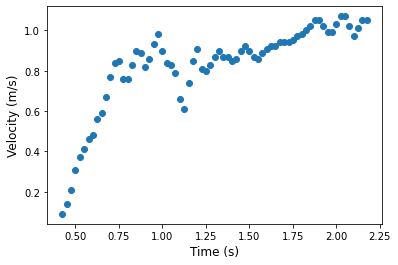

In [6]:
import matplotlib.pyplot as plt
plt.plot(df.t,df.v,'o')
plt.xlabel('Time (s)',fontsize='large')
plt.ylabel('Velocity (m/s)',fontsize='large')
plt.show()

You will see the velocity approaches a constant value - the terminal velocity.

To get an estimate of the drag coefficient, do the following:

* use pandas to select the portion of your data where the velocity is constant

* fit those data with a constant value (a zeroth-order polynomial)

* from that value, estimate the drag coefficient $b$

***

### Numerical solution of the equation of motion

As stated above, the net force on the falling object is:

$$ F_{\rm net} = mg - bv^2 $$

However this is actually a second order differential equation.  Because $F=ma$, and $a = d^2 x / dt^2$, we can write the above equation as:

$$ \frac{d^2 x}{dt^2} = g - \frac{b}{m} \left( \frac{dx}{dt} \right)^2 $$

In this part of the lab, we will try to solve the above equation for $x(t)$ and compare it with your measured results.

The equation above *does* have an analytical solution, but it's very unpleasant.  Instead we will solve it by integrating numerically.  Thankfully Python does all of the hard work for us - we only have to set it up.

Walking you through a solution to the above equation would be a little too easy.  Instead we'll look at how to solve something similar - a mass on a spring with damping.  In that case, the equation of motion is given by:

$$ \frac{d^2 x}{dt^2} = -\frac{k}{m} x - \frac{b}{m} \frac{dx}{dt} $$

where the mass $m$ is subject to a damping force $-bv$ which acts opposite to velocity.

We're going to use a function from the `scipy.integrate` module called `odeint` to solve our differential equation.  However there are really *two* differential equations here, one for $a$ and one for $v$.  So we will actually be solving two differential equations at once (again, the hard work is done for us).

First, we need to set up a function which returns the derivative of each quantity we are trying to solve for:

In [7]:
def derivs(q,t,k,b,m):
    x,v = q
    dydt = [v,-k*x/m-b*v/m]
    return dydt

This function takes several inputs.  First, an array ($q$) which contains the position and velocity.  Then a value for time (which isn't used since our force doesn't depend on time).  And then finally the spring constant, drag coefficient, and mass for the system.

Let's put in some initial values:

In [8]:
import numpy as np

k = 1.5    # spring constant in N/m
b = 0.1    # drag coefficient in kg/s
m = 0.2    # mass in kg

q0 = [1,0] # initial position and velocity

time = np.linspace(0,10,1000)

The last command will generate an array from 0 to 10 seconds, with 1000 elements.

Now let's solve and plot the results.

In [9]:
from scipy.integrate import odeint
sol = odeint(derivs,q0,time,args=(k,b,m))

The solution (`sol`) is a two-column array, where one column is position and the other is velocity.

In [10]:
print(sol)

[[ 1.          0.        ]
 [ 0.9996249  -0.07487812]
 [ 0.99850237 -0.1493263 ]
 ...
 [-0.03394861 -0.19759846]
 [-0.03590865 -0.19399594]
 [-0.03783199 -0.190266  ]]


We'll need to pick all of the elements from the first (zeroth) column to look at position.

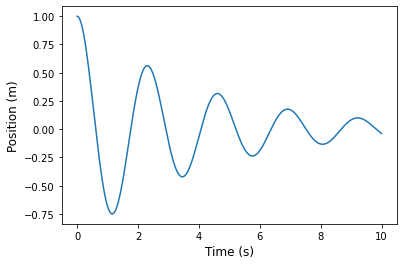

In [11]:
plt.plot(time,sol[:,0],'-')
plt.xlabel('Time (s)',fontsize='large')
plt.ylabel('Position (m)',fontsize='large')
plt.show()

You can see the motion oscillates, but is damped out over time, exactly as you would expect.

* Following the procedure above, create a numerical solution for the equation of motion of your falling object.

* Use the actual mass as the value for $m$, and use the value for $b$ you found above from your data.

* Make a plot of position vs. time, and plot your simulation on the same plot as your actual data.  Note that you may need to start the time values for your simulation at the same time your data starts.  You may also need to adjust the starting position.

***

### To be submitted:

* A header with the usual stuff

* Plots of position vs. time and velocity vs. time from your data, excluding any "bad" values

* Estimation of the drag coefficient $b$ based on your measurements

* Your numerical solution to the equation of motion for the falling object

* Your plot of position vs. time from the numerical solution, on the same plot as your actual data

* Discussion of how well your numerical solution fit the actual data

* Discussion of possible sources of error, if the solution is not a good fit to your data (note: there are *many*, but "human error" is not one of them)